In [1]:
 #Load and Inspect Data
import pandas as pd
file_path = 'tips (data for regression problem).csv'  # Update with your actual file path
tips_data = pd.read_csv(file_path)
print(tips_data.info())
print(tips_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


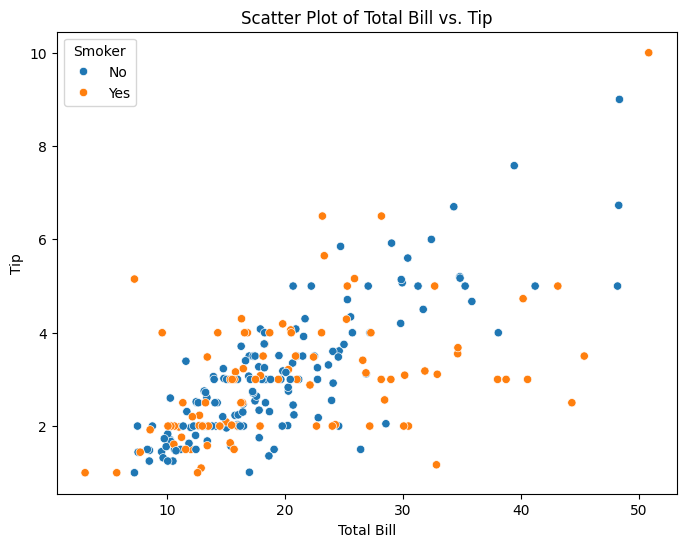

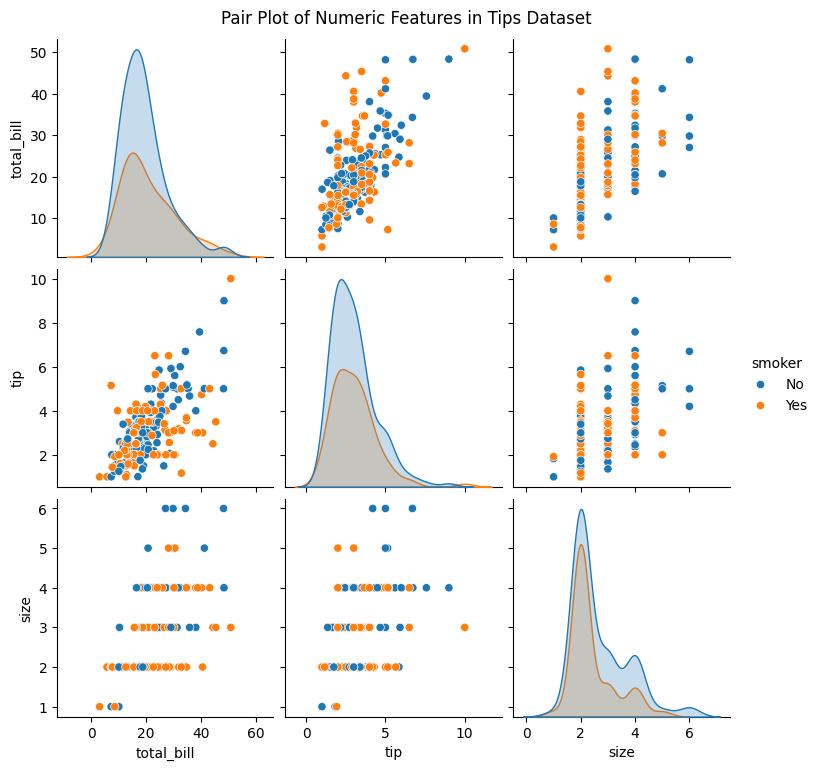

In [2]:
#scatter plot and pair plot
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot for total_bill vs tip, colored by smoker status
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips_data, hue='smoker')
plt.title("Scatter Plot of Total Bill vs. Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.legend(title="Smoker")
plt.show()

# Pair plot for numeric variables
sns.pairplot(tips_data, diag_kind='kde', hue='smoker')
plt.suptitle("Pair Plot of Numeric Features in Tips Dataset", y=1.02)
plt.show()


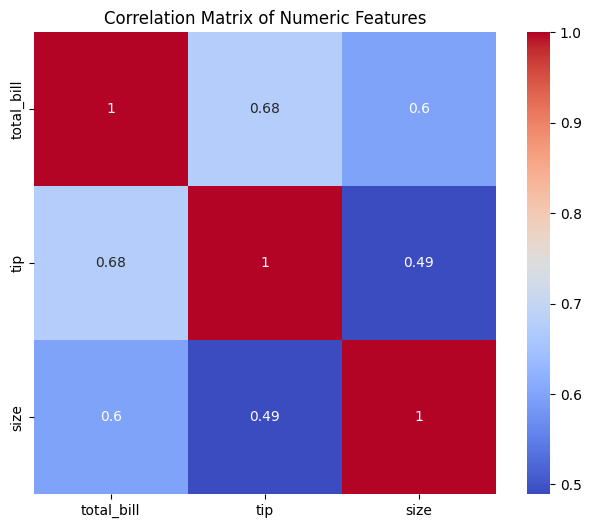

In [3]:
#Correlation Matrix (Heatmap)
# Heatmap for correlation between numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(tips_data[['total_bill', 'tip', 'size']].corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


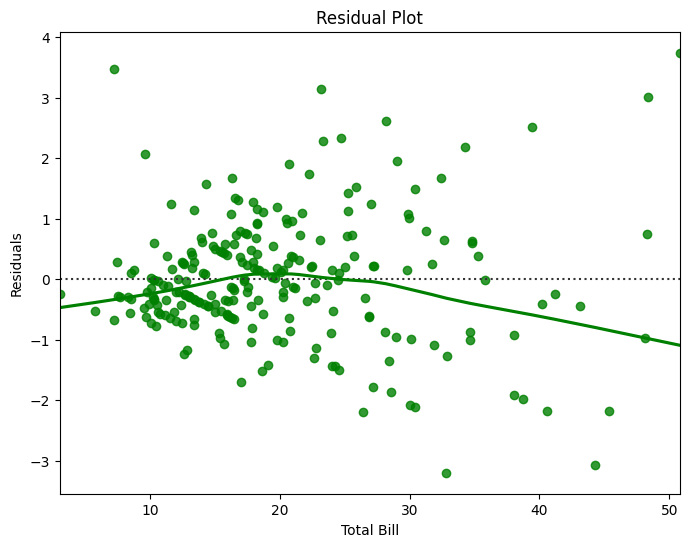

In [5]:
# Residual plot
from sklearn.linear_model import LinearRegression

# Define features and target variable for linear regression
X = tips_data[['total_bill']].values.reshape(-1, 1)  # Ensure X is a 2D array
y = tips_data['tip'].values  # Ensure y is a 1D array

# Fit the model
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Calculate residuals
residuals = y - predictions

# Plot residuals
plt.figure(figsize=(8, 6))
sns.residplot(x=X.flatten(), y=residuals, lowess=True, color="g")
plt.title("Residual Plot")
plt.xlabel("Total Bill")
plt.ylabel("Residuals")
plt.show()


In [6]:
#Linearity Check (Rainbow Test)
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow

# Rainbow test for linearity
X_const = sm.add_constant(X)  # Add constant for intercept
rainbow_stat, rainbow_p_value = linear_rainbow(sm.OLS(y, X_const).fit())
print(f"Rainbow test statistic: {rainbow_stat}, p-value: {rainbow_p_value}")


Rainbow test statistic: 1.2291480226129028, p-value: 0.12911921525513964


In [7]:
# One-hot encode categorical variables
tips_data_encoded = pd.get_dummies(tips_data, drop_first=True)
X = tips_data_encoded.drop(columns='tip')
y = tips_data_encoded['tip']
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
#Linear Regression, Ridge, and Lasso
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(y_test, lin_pred))
print("Linear Regression R^2:", r2_score(y_test, lin_pred))

# Ridge Regression
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
print("Ridge Regression MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge Regression R^2:", r2_score(y_test, ridge_pred))

# Lasso Regression
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)
print("Lasso Regression MSE:", mean_squared_error(y_test, lasso_pred))
print("Lasso Regression R^2:", r2_score(y_test, lasso_pred))


Linear Regression MSE: 0.7033566017436105
Linear Regression R^2: 0.43730181943482505
Ridge Regression MSE: 0.7007477213216073
Ridge Regression R^2: 0.4393889716178486
Lasso Regression MSE: 0.5908528649971524
Lasso Regression R^2: 0.5273068720881755


In [9]:
#Decision Tree and Ensemble Methods (Random Forest)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Decision Tree Regression
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)
tree_pred = tree_reg.predict(X_test)
print("Decision Tree MSE:", mean_squared_error(y_test, tree_pred))
print("Decision Tree R^2:", r2_score(y_test, tree_pred))

# Random Forest Regression
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
forest_pred = forest_reg.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, forest_pred))
print("Random Forest R^2:", r2_score(y_test, forest_pred))


Decision Tree MSE: 1.2551938775510205
Decision Tree R^2: -0.004178121600921791
Random Forest MSE: 0.9196720148979602
Random Forest R^2: 0.2642455218065466


In [10]:
#Support Vector Regression (SVR)
from sklearn.svm import SVR

# Support Vector Regression
svr_reg = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_reg.fit(X_train, y_train)
svr_pred = svr_reg.predict(X_test)
print("SVR MSE:", mean_squared_error(y_test, svr_pred))
print("SVR R^2:", r2_score(y_test, svr_pred))


SVR MSE: 1.2099661072335373
SVR R^2: 0.032004924105307975


In [11]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsRegressor

# KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_pred = knn_reg.predict(X_test)
print("KNN MSE:", mean_squared_error(y_test, knn_pred))
print("KNN R^2:", r2_score(y_test, knn_pred))


KNN MSE: 0.8763725714285714
KNN R^2: 0.29888587066985495
